## Problem Set 2

##### Packages loaded 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Function to generate linear data experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if eps = 1)
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller betas to zero
    beta[abs(beta)<1.0]=0.
    # bused is the fraction of nonzero beta's
    bused= np.sum( abs(beta)>0.)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # Python 2.7 users, this is the nifty new
    # python 3.6 notation for matrices
    # For nonmatrix students, this is the sum of the betas's time each X(m)
    # across all i
    y = X @ beta + eps
    return X,y, bused

#### First, generate one set of X,y data of length 300, with M = 50 forecast variables, and noise=1. Do a short (100) monte-carlo run with the same set of data, but different random train/test splits (don’t use the random_state parameter since that fixes the random draws). Set the test_size = 0.5 for all problems here. On each split fit a linear regression and record the train and test score (R-squared). Report the mean and standard deviation for both of these across the 100 monte-carlos.

In [49]:
X,y,z = genLinData(300,50,1)
train = []
test = []
for i in range(1, 301):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    lr = LinearRegression().fit(X_train, y_train)
    train.append(lr.score(X_train, y_train))
    test.append(lr.score(X_test, y_test))
    
print("Training set mean:", np.mean(train))
print("Training set SD:", np.std(train))
print("Test set mean:", np.mean(test))
print("Test set SD:", np.std(test)) 

Training set mean: 0.6022051607334787
Training set SD: 0.04422478216971354
Test set mean: 0.08287258676309495
Test set SD: 0.11492495775387877


#### Run this regression once on a sample size of 100,000. Report train and test scores. Are they close? Why or why not?

In [ ]:
k = 100000
X,y,z = genLinData(k,50,1)
train = np.ones(k)
test = np.ones(k)
for i in range(0, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    lr = LinearRegression().fit(X_train, y_train)
    train[i] = lr.score(X_train, y_train)
    test[i] = lr.score(X_test, y_test)
print("Training set mean:", np.mean(train))
print("Training set SD:", np.std(train))
print("Test set mean:", np.mean(test))
print("Test set SD:", np.std(test))

In [50]:
# Yes, they are close because linear regression performs better with large datasets. 
# In case of small datasets,
# linear regression underfits the data most of the times.

#### Now, run a monte-carlo where on each run you draw a new data set (X,y) from a sample size of 300 (M=50, noise = 1.0) using the above function. On each run estimate a linear model, and record the training and testing scores, and save them. Report the mean and standard deviation for each of these.

In [51]:
train = []
test = []
for i in range(1, 301):
    X,y,z = genLinData(300,50,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    lr = LinearRegression().fit(X_train, y_train)
    train.append(lr.score(X_train, y_train))
    test.append(lr.score(X_test, y_test))
    
print("Training set mean:", np.mean(train))
print("Training set SD:", np.std(train))
print("Test set mean:", np.mean(test))
print("Test set SD:", np.std(test))

Training set mean: 0.6243975465802747
Training set SD: 0.06439563132832256
Test set mean: 0.1288056037096003
Test set SD: 0.17465328091478402


#### Simulate one new data set using the parameters from the last problem. Now set up a Ridge regression. Set up a loop to sweep through alpha from 1 to 25 incremented by 1. Record the score for each ridge regression for each parameter. At the end, plot the R-squared scores for both the training and testing samples across the different values of alpha.

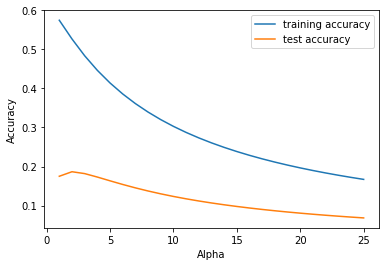

In [52]:
tr = []
te = []
b = 0
a = np.ones(25)
X,y,z = genLinData(300,50,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
for i in range(1, 26):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    tr.append(ridge.score(X_train, y_train))
    te.append(ridge.score(X_test, y_test))
    a[b] = i
    b = b+1
plt.plot(a, tr, label="training accuracy")
plt.plot(a, te, label="test accuracy")   
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()

#### Now repeat this for a Lasso regression. However, this time sweep the alpha parameter from 0.01 through 0.03 incremented by 0.0005. Plot the two scores as you did in the last problem. Also, this time plot the number of non zero coefficients estimated by Ridge as a fraction of the true non zero coefficients from the simulation.

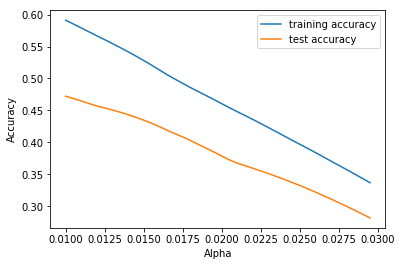

In [53]:
tr = []
te = []
b = 0
a = np.ones(40)
X,y,z = genLinData(300,50,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
for i in np.arange(0.01, 0.03, 0.0005):
    lasso = Lasso(alpha=i).fit(X_train, y_train)
    tr.append(lasso.score(X_train, y_train))
    te.append(lasso.score(X_test, y_test))
    a[b] = i
    b = b+1
plt.plot(a, tr, label="training accuracy")
plt.plot(a, te, label="test accuracy")   
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()